# **Tech Challenge: Sistema Inteligente de Suporte ao Diagnóstico de Doenças Cardíacas**

## **Fase 1: Análise Preditiva com Machine Learning**

### **Introdução**

Este projeto é a primeira fase do Tech Challenge, focado no desenvolvimento de um sistema inteligente de suporte ao diagnóstico médico. O objetivo é criar uma solução baseada em Inteligência Artificial e Machine Learning para analisar dados clínicos e auxiliar equipes médicas na triagem e tomada de decisão.

Nesta etapa inicial, o desafio consiste em construir a base do sistema, utilizando algoritmos de aprendizado de máquina para realizar um diagnóstico a partir de dados estruturados. A tarefa é classificar se um indivíduo tem ou não uma determinada doença com base em um conjunto de dados.

### **1. O Problema: Previsão de Doença Cardíaca**

Com o crescente volume de exames e dados de pacientes, a capacidade de acelerar a análise inicial e destacar informações relevantes é crucial para otimizar o tempo dos profissionais de saúde e reduzir potenciais erros.

Para este desafio, foi escolhido o dataset ["Heart Disease Health Indicators Dataset" (Doença Cardíaca)](https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset), disponível no Kaggle. O objetivo é desenvolver um modelo preditivo capaz de identificar a presença ou ausência de doença cardíaca em um paciente com base em diversos indicadores de saúde, como Índice de Massa Corporal (IMC), tabagismo, prática de atividades físicas e histórico de diabetes.

### **Metodologia**

Para atingir o objetivo, este notebook seguirá as seguintes etapas:

1.  **O Problema: Previsão de Doença Cardíaca**: Seção atual, com breve introdução ao trabalho.

2.  **Exploração de Dados**: Carregamento, análise das características, estatísticas descritivas e visualização dos dados para um entendimento inicial.

3.  **Pré-processamento**: Limpeza, tratamento de valores ausentes (se houver) e preparação das variáveis para a modelagem.

4.  **Modelagem**: Criação de pelo menos dois modelos de classificação distintos (como Regressão Logística, Árvore de Decisão, etc.), com uma clara separação entre dados de treino, validação e teste.

5.  **Treinamento e Avaliação**: Treinamento dos modelos e avaliação de sua performance utilizando métricas apropriadas como acurácia, recall e F1-score.

6.  **Interpretação e Conclusão**: Análise da importância das *features* (utilizando técnicas como *Feature Importance* e SHAP) e uma discussão crítica sobre a aplicabilidade prática do modelo como ferramenta de suporte ao diagnóstico médico.

---

### **2. Exploração de Dados**

Nesta seção, vamos carregar o dataset **"Heart Disease Health Indicators"** e realizar uma análise exploratória inicial para entender suas principais características. O objetivo é investigar a estrutura dos dados, a distribuição das variáveis e identificar padrões ou insights preliminares.

#### **2.1. Carregamento das Bibliotecas e do Dataset**
Primeiro, vamos importar as bibliotecas essenciais para a análise e carregar os dados de um arquivo heart_disease_health_indicators_BRFSS2015.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

try:
    df = pd.read_csv('https://raw.githubusercontent.com/antrafa/fiap-tech-challenge-6IADT/refs/heads/main/data/heart_disease_health_indicators_BRFSS2015.csv')
except FileNotFoundError:
    print("Arquivo não encontrado. Certifique-se de que o nome do arquivo está correto e no diretório certo.")

print("As 5 primeiras linhas do dataset:")
df.head()

As 5 primeiras linhas do dataset:


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


#### **2.2. Características Gerais do Dataset**

Agora, vamos explorar as características básicas do conjunto de dados, como o número de linhas e colunas, os tipos de dados de cada coluna e a presença de valores nulos.

Abaixo estão as colunas presentes no dataset:

| Coluna                  | Descrição                                                                                               |
|-------------------------|---------------------------------------------------------------------------------------------------------|
| `HeartDiseaseorAttack`  | **Variável Alvo:** Indica se o indivíduo já teve doença cardíaca ou derrame (0 = Não, 1 = Sim).         |
| `HighBP`                | Pressão arterial alta (0 = Não, 1 = Sim).                                                               |
| `HighChol`              | Colesterol alto (0 = Não, 1 = Sim).                                                                     |
| `CholCheck`             | Checou o colesterol nos últimos 5 anos (0 = Não, 1 = Sim).                                              |
| `BMI`                   | Índice de Massa Corporal (numérico).                                                                    |
| `Smoker`                | Já fumou pelo menos 100 cigarros em toda a vida (0 = Não, 1 = Sim).                                     |
| `Stroke`                | Já teve um derrame (0 = Não, 1 = Sim).                                                                  |
| `Diabetes`              | Status de diabetes (0 = Não, 1 = Pré-diabetes, 2 = Diabetes).                                           |
| `PhysActivity`          | Fez atividade física nos últimos 30 dias (0 = Não, 1 = Sim).                                            |
| `Fruits`                | Consome frutas diariamente (0 = Não, 1 = Sim).                                                          |
| `Veggies`               | Consome vegetais diariamente (0 = Não, 1 = Sim).                                                        |
| `HvyAlcoholConsump`     | Consumo excessivo de álcool (homens >14/semana, mulheres >7/semana) (0 = Não, 1 = Sim).                 |
| `AnyHealthcare`         | Possui algum tipo de cobertura de saúde (0 = Não, 1 = Sim).                                             |
| `NoDocbcCost`           | Houve alguma vez que não procurou um médico por causa do custo (0 = Não, 1 = Sim).                      |
| `GenHlth`               | Autoavaliação da saúde geral (escala de 1 a 5, 1=Excelente, 5=Ruim).                                    |
| ``MentHlth``            | Número de dias nos últimos 30 em que a saúde mental não esteve boa (numérico, 0-30).                    |
| `PhysHlth`              | Número de dias nos últimos 30 em que a saúde física não esteve boa (numérico, 0-30).                    |
| `DiffWalk`              | Tem grande dificuldade para caminhar ou subir escadas (0 = Não, 1 = Sim).                               |
| `Sex`                   | Sexo biológico (0 = Feminino, 1 = Masculino).                                                           |
| `Age`                   | Categoria de idade (escala de 1 a 13, representando faixas etárias).                                    |
| `Education`             | Nível de escolaridade (escala de 1 a 6).                                                                |
| `Income`                | Categoria de renda (escala de 1 a 8).                                                                   |

In [2]:
print(f"O dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.")
print("\nInformações gerais do dataset:")
df.info()

O dataset possui 253680 linhas e 22 colunas.

Informações gerais do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           25368

>**Análise:**
>
>O dataset é composto por 253.680 registros e 22 colunas. Uma observação importante da saída `df.info()` é que todas as colunas são do tipo float64 e não há valores nulos, o que simplifica a etapa de limpeza de dados. As variáveis representam indicadores de saúde e a variável alvo,  `HeartDiseaseorAttack`.

#### **2.3. Estatísticas Descritivas**

Vamos analisar as estatísticas descritivas para as variáveis numéricas, o que nos dará uma visão sobre a tendência central, dispersão e distribuição dos dados.

O comando `describe` exibe estatísticas descritivas básicas para cada coluna numérica do dataset:

| Estatística    | Significado                                                    |
| -------------- | -------------------------------------------------------------- |
| `count`        | Quantidade de valores não nulos                                |
| `mean`         | Média (valor médio)                                            |
| `std`          | Desvio padrão (dispersão dos dados)                            |
| `min`          | Valor mínimo                                                   |
| `25%`          | Primeiro quartil (Q1) – 25% dos dados estão abaixo desse valor |
| `50%` (median) | Mediana – metade dos dados está abaixo                         |
| `75%`          | Terceiro quartil (Q3) – 75% dos dados estão abaixo desse valor |
| `max`          | Valor máximo                                                   |


In [3]:
print("Estatísticas Descritivas:")
display(df.describe())

Estatísticas Descritivas:


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


>**Análise:**
>
>As estatísticas descritivas nos mostram que:
>
>- `HeartDiseaseorAttack`: A média de 0.09 indica que cerca de 9% dos pacientes no dataset têm histórico de doença cardíaca ou ataque cardíaco. Isso aponta para um dataset desbalanceado, algo que precisará de atenção na etapa de modelagem.
>
>- `BMI (IMC)`: A média do Índice de Massa Corporal é de 28.3, com um desvio padrão de 6.6. O valor máximo de 98.0 pode indicar a presença de outliers.
>
>- `Age`: A idade é representada em 13 categorias, variando de 1 (18-24 anos) a 13 (80 anos ou mais), com uma média na categoria 8 (55-59 anos).
>
>- Muitas variáveis são binárias (0 ou 1), como `HighBP`, `HighChol`, `Smoker`, `Stroke`, etc., onde a média representa a proporção de pacientes com a característica positiva.

#### **2.4. Visualização da Distribuição das Variáveis**
A visualização é uma das melhores formas de entender a distribuição dos dados.

Distribuição da Variável Alvo (`HeartDiseaseorAttack`)

Primeiro, vamos verificar o desbalanceamento da nossa variável alvo.

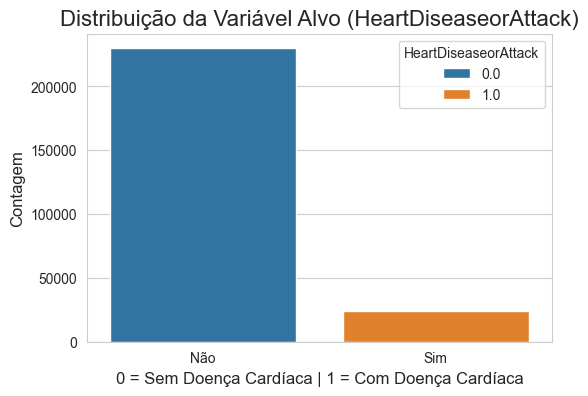

HeartDiseaseorAttack
0.0    0.905814
1.0    0.094186
Name: proportion, dtype: float64


In [4]:
sns.set_style('whitegrid')
plt.figure(figsize=(6, 4))

sns.countplot(x='HeartDiseaseorAttack', data=df, hue='HeartDiseaseorAttack')
plt.title('Distribuição da Variável Alvo (HeartDiseaseorAttack)', fontsize=16)
plt.xlabel('0 = Sem Doença Cardíaca | 1 = Com Doença Cardíaca', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.xticks([0, 1], ['Não', 'Sim'])
plt.show()

print(df['HeartDiseaseorAttack'].value_counts(normalize=True))

>**Análise:**
>
>O gráfico e os números confirmam o que vimos na estatística descritiva: o dataset é significativamente desbalanceado. Aproximadamente 90.6% das entradas são de pacientes sem doença cardíaca (classe 0) e apenas 9.4% são de pacientes com a doença (classe 1). Esse desbalanceamento é um ponto crítico e deve ser tratado durante o pré-processamento ou na modelagem para evitar que o modelo seja enviesado para a classe majoritária.

**Distribuição das Variáveis Numéricas**

Agora, vamos plotar histogramas para todas as variáveis para visualizar suas distribuições.

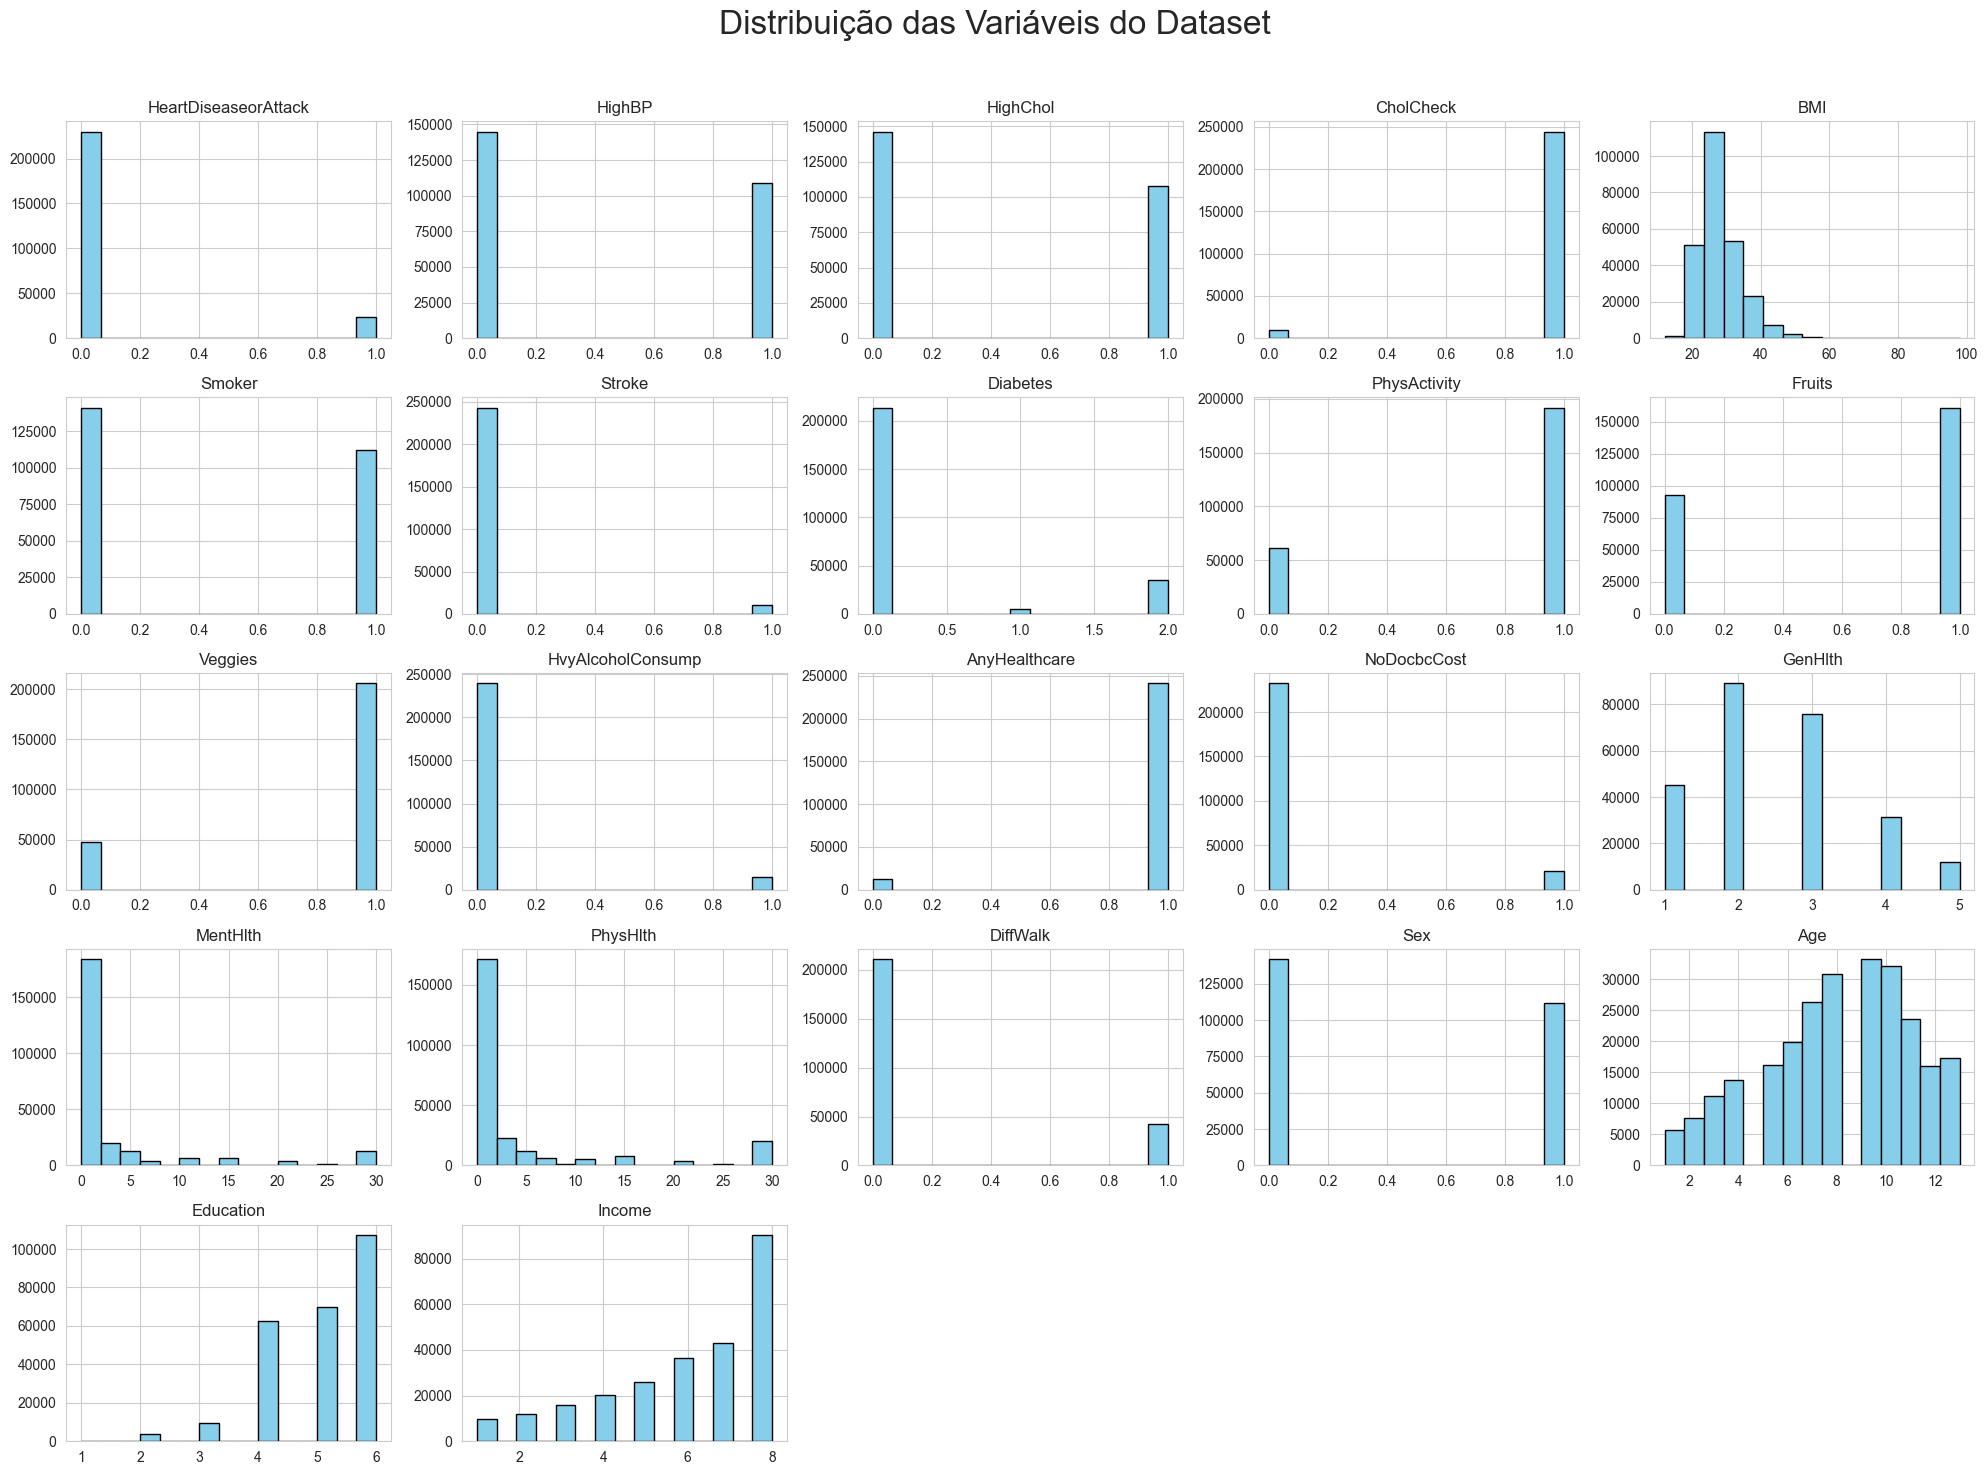

In [5]:
df.hist(figsize=(20, 15), bins=15, color='skyblue', edgecolor='black')
plt.suptitle('Distribuição das Variáveis do Dataset', size=24)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

>**Análise:**
>
>Os histogramas nos fornecem um panorama visual completo do dataset:
>
>- As variáveis binárias (como HighBP, Smoker, Diabetes, etc.) mostram a proporção de 'sim' e 'não' para cada condição.
>
>- Variáveis como GenHlth (Saúde Geral), MentHlth (Saúde Mental) e PhysHlth (Saúde Física) são escalas ordinais e mostram distribuições interessantes, com a maioria das pessoas relatando boa saúde geral e poucos dias de saúde mental ou física ruins.
>
>- A variável Income (Renda) também é uma escala e mostra uma distribuição variada entre as diferentes faixas de renda.

---

### **3. Pré-processamento de Dados**

O pré-processamento é uma etapa crucial que envolve a limpeza e a transformação dos dados brutos em um formato adequado para a modelagem. Conforme os requisitos do projeto, vamos realizar a limpeza necessária, criar um pipeline de preparação e analisar a correlação entre as variáveis.

#### **3.1. Limpeza e Preparação dos Dados**

Da etapa de exploração, vimos que o dataset não possui valores ausentes. No entanto, vamos verificar a existência de dados duplicados,

In [6]:
print(f"Formato do dataset antes do tratamento de linhas duplicadas {df.shape}.")
duplicatas = df.duplicated().sum()
print(f"O dataset possui {duplicatas} linhas duplicadas.")

if duplicatas > 0:
    df.drop_duplicates(inplace=True)
    print(f"Linhas duplicadas foram removidas. Novo shape do dataset: {df.shape}")

Formato do dataset antes do tratamento de linhas duplicadas (253680, 22).
O dataset possui 23899 linhas duplicadas.
Linhas duplicadas foram removidas. Novo shape do dataset: (229781, 22)


> **Análise:**
>
>Foram identificadas e removidas 23.899 linhas duplicadas. A remoção desses dados é fundamental para garantir que a avaliação do modelo seja feita em dados únicos e represente um cenário mais realista.

#### **3.2. Separação entre Features e Target**

Antes de prosseguir, precisamos separar o nosso conjunto de dados em variáveis preditoras (X), que são os indicadores de saúde, e a variável alvo (y), que é `HeartDiseaseorAttack`.

In [7]:
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

print("Shape de X (features):", X.shape)
print("Shape de y (target):", y.shape)

Shape de X (features): (229781, 21)
Shape de y (target): (229781,)


#### **3.3. Tratamento do Desbalanceamento de Classes com SMOTE**

Como identificado na análise exploratória, temos um forte desbalanceamento entre as classes. Um modelo treinado com esses dados tenderá a favorecer a classe majoritária (pacientes sem doença cardíaca).

Para mitigar isso, usaremos a técnica SMOTE (Synthetic Minority Over-sampling Technique). O SMOTE cria novas amostras sintéticas da classe minoritária, balanceando o conjunto de dados de treinamento.

Primeiro, vamos separar os dados em treino e teste.

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Distribuição da classe no y_train antes do SMOTE:")
print(y_train.value_counts(normalize=True))

Distribuição da classe no y_train antes do SMOTE:
HeartDiseaseorAttack
0.0    0.896782
1.0    0.103218
Name: proportion, dtype: float64


Agora, aplicamos o SMOTE ao conjunto de treino.

In [9]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("\nShape de X_train após resampling:", X_train_resampled.shape)
print("Shape de y_train após resampling:", y_train_resampled.shape)

print("\nDistribuição da classe no y_train após o SMOTE:")
print(y_train_resampled.value_counts(normalize=True))


Shape de X_train após resampling: (329700, 21)
Shape de y_train após resampling: (329700,)

Distribuição da classe no y_train após o SMOTE:
HeartDiseaseorAttack
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


> **Análise:**
>
>Após a aplicação do SMOTE, o conjunto de treinamento agora está perfeitamente balanceado, com 50% das amostras para cada classe. Isso ajudará os modelos a aprenderem as características de ambas as classes (com e sem doença cardíaca) de forma mais eficaz, o que é fundamental para um problema de diagnóstico médico.

#### **3.4. Análise de Correlação**

Para finalizar o pré-processamento, vamos realizar uma análise de correlação entre as variáveis. Isso nos ajuda a entender como os indicadores de saúde se relacionam entre si e com a ocorrência de doenças cardíacas.

In [12]:
df.corr()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.201271,0.176279,0.049995,0.039926,0.105154,0.198863,0.170816,-0.073267,-0.007128,...,0.025899,0.022076,0.246411,0.052756,0.170473,0.202779,0.089717,0.223626,-0.082466,-0.122908
HighBP,0.201271,1.000000,0.284186,0.111220,0.194126,0.074237,0.124426,0.261976,-0.104131,-0.019329,...,0.052084,0.002216,0.272562,0.037374,0.144413,0.211498,0.047155,0.339808,-0.112676,-0.139782
HighChol,0.176279,0.284186,1.000000,0.094753,0.089615,0.074627,0.089258,0.203327,-0.063266,-0.026125,...,0.052412,0.002900,0.187929,0.050212,0.110801,0.135826,0.022894,0.263866,-0.049838,-0.061871
CholCheck,0.049995,0.111220,0.094753,1.000000,0.042420,-0.003776,0.027894,0.075701,-0.004409,0.017973,...,0.115539,-0.054198,0.062782,-0.001549,0.040612,0.048969,-0.024255,0.095996,-0.009758,0.002161
BMI,0.039926,0.194126,0.089615,0.042420,1.000000,-0.009196,0.011062,0.212027,-0.127864,-0.067528,...,-0.008560,0.045837,0.208411,0.068653,0.102844,0.182604,0.030989,-0.049347,-0.074568,-0.069192
Smoker,0.105154,0.074237,0.074627,-0.003776,-0.009196,1.000000,0.054438,0.046774,-0.066981,-0.061947,...,-0.013983,0.037353,0.134979,0.077715,0.100514,0.108179,0.096709,0.107653,-0.135793,-0.095418
Stroke,0.198863,0.124426,0.089258,0.027894,0.011062,0.054438,1.000000,0.100276,-0.059440,-0.004613,...,0.013565,0.028691,0.169870,0.062111,0.140919,0.169442,0.003560,0.128040,-0.064319,-0.117232
Diabetes,0.170816,0.261976,0.203327,0.075701,0.212027,0.046774,0.100276,1.000000,-0.103408,-0.025462,...,0.024911,0.023568,0.284881,0.057698,0.160485,0.210638,0.032243,0.184642,-0.107742,-0.147102
PhysActivity,-0.073267,-0.104131,-0.063266,-0.004409,-0.127864,-0.066981,-0.059440,-0.103408,1.000000,0.125283,...,0.024095,-0.046620,-0.237676,-0.106175,-0.199562,-0.235943,0.033586,-0.087539,0.171224,0.166171
Fruits,-0.007128,-0.019329,-0.026125,0.017973,-0.067528,-0.061947,-0.004613,-0.025462,0.125283,1.000000,...,0.022756,-0.032521,-0.071433,-0.052409,-0.024744,-0.030188,-0.088628,0.073726,0.085174,0.051230


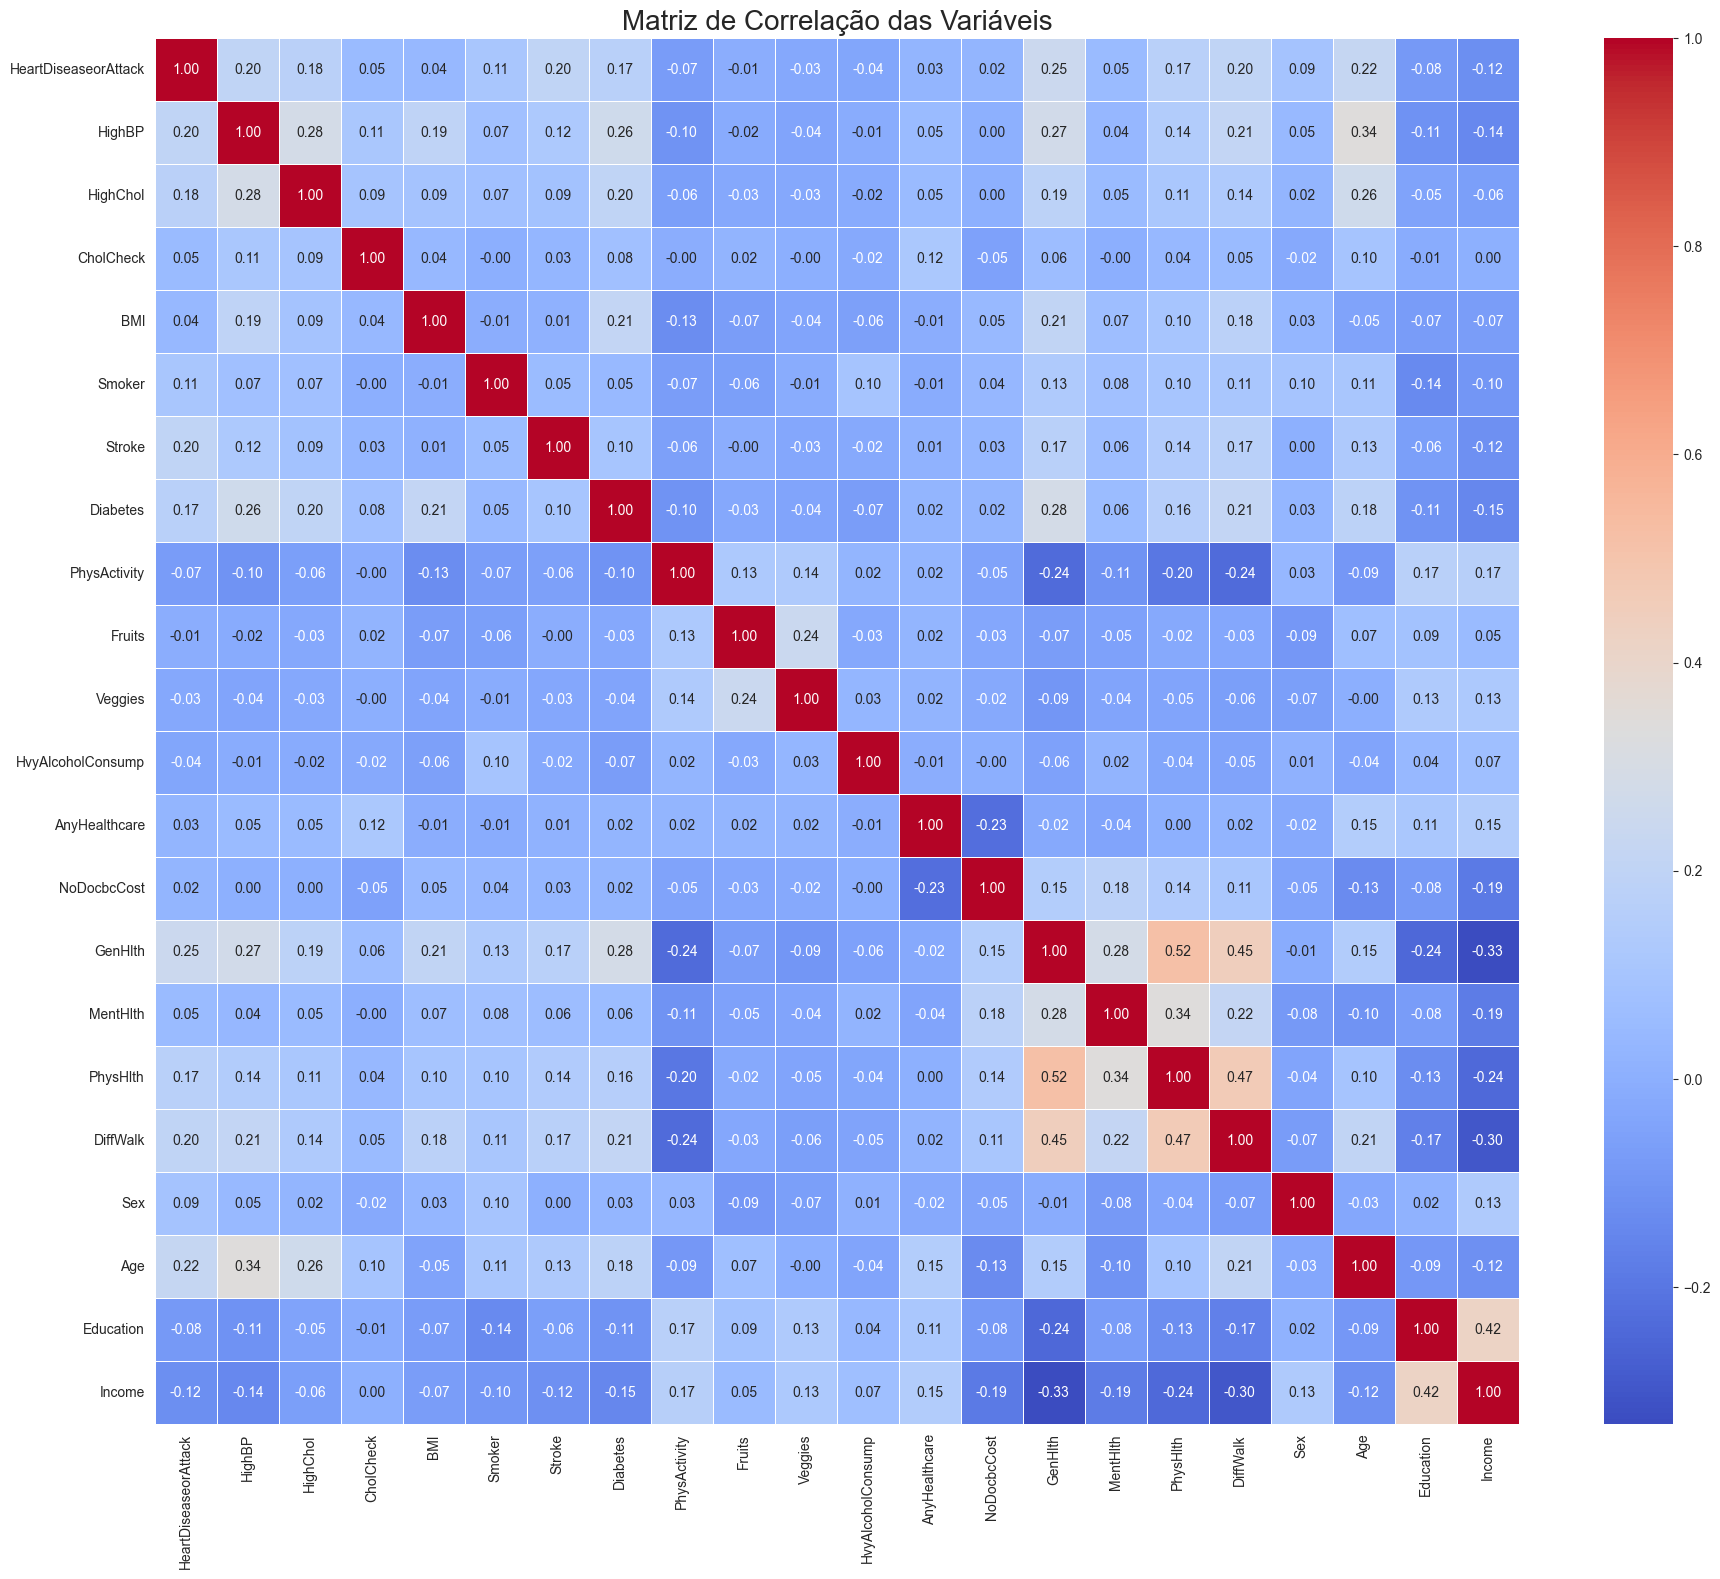

In [10]:
correlation_matrix = df.corr()

plt.figure(figsize=(22, 18))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Matriz de Correlação das Variáveis', fontsize=20)
plt.show()

> **Análise do Heatmap:**
>
>O mapa de calor ilustra a força da relação entre as variáveis.
>
>- Correlações com a variável alvo (HeartDiseaseorAttack):
>
>   - Indicadores como `GenHlth` (Saúde Geral), `Age` (Idade), `DiffWalk` (Dificuldade para caminhar), `HighBP` (Pressão Alta) e `Stroke` (Derrame) mostram as correlações positivas mais fortes com a doença cardíaca. Isso sugere que são fatores de risco importantes.
>
>   - `Income` (Renda) e `Education` (Educação) mostram correlações negativas, indicando que níveis mais altos de renda e educação estão associados a uma menor probabilidade de doença cardíaca.
>
>- Correlações entre features:
>
>   - Existe uma forte correlação positiva entre `GenHlth` (Saúde Geral) e `PhysHlth` (Saúde Física), o que é esperado.
>
>   - `HighBP` (Pressão Alta) e `HighChol` (Colesterol Alto) também possuem uma correlação moderada.

#### **3.5. Análise Visual Comparativa (Adicional)**

Para entender melhor o impacto de cada indicador de saúde na ocorrência de doenças cardíacas, vamos criar alguns gráficos que comparam diretamente os grupos de pacientes (com e sem a doença).

**Boxplots para Variáveis Numéricas e Ordinais**

Os boxplots são excelentes para comparar a distribuição de variáveis contínuas ou ordinais entre diferentes categorias. Vamos analisar `BMI`, `PhysHlth` (Saúde Física), `GenHlth` (Saúde Geral) e `Age`

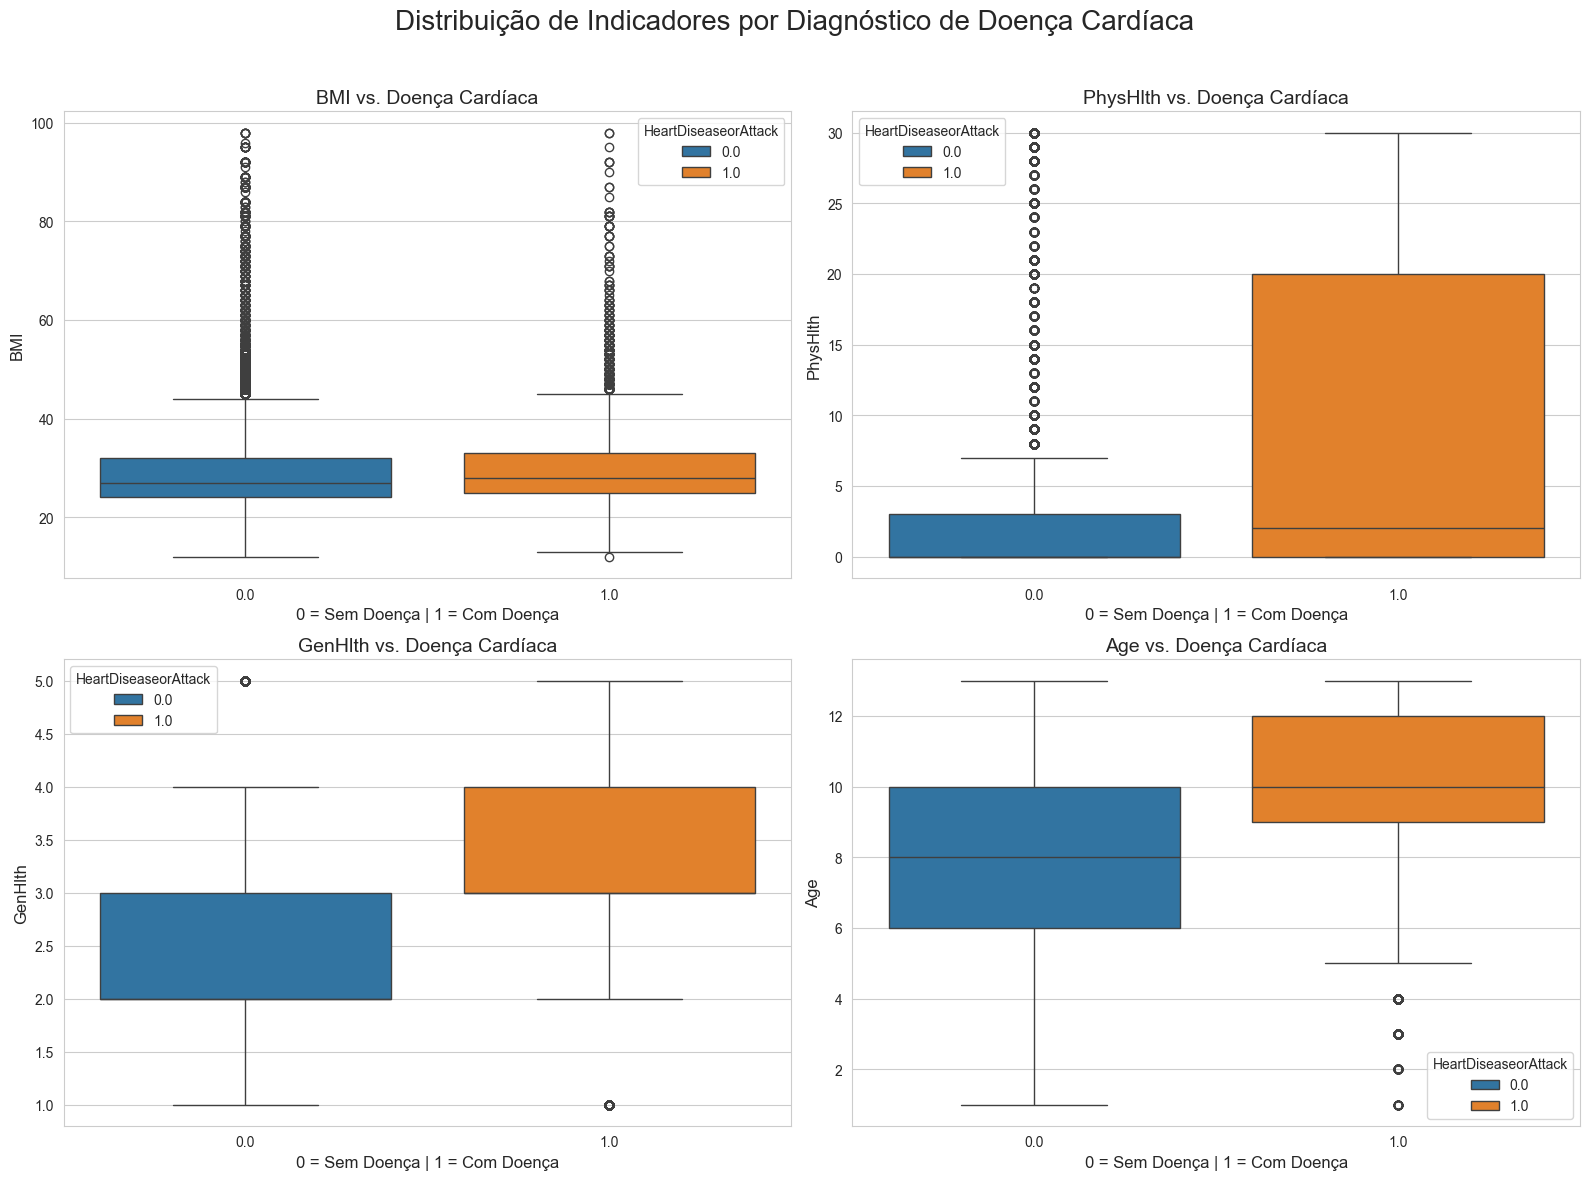

In [16]:
features_to_plot = ['BMI', 'PhysHlth', 'GenHlth', 'Age']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribuição de Indicadores por Diagnóstico de Doença Cardíaca', fontsize=20)

for i, feature in enumerate(features_to_plot):
    sns.boxplot(ax=axes[i//2, i%2], x='HeartDiseaseorAttack', y=feature, data=df, hue='HeartDiseaseorAttack')
    axes[i//2, i%2].set_title(f'{feature} vs. Doença Cardíaca', fontsize=14)
    axes[i//2, i%2].set_xlabel('0 = Sem Doença | 1 = Com Doença', fontsize=12)
    axes[i//2, i%2].set_ylabel(feature, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

> **Análise dos Boxplots:**
>
>BMI (IMC): A mediana do IMC é ligeiramente maior no grupo com doença cardíaca.
>
>PhysHlth (Saúde Física): A diferença é muito clara. Pessoas com doença cardíaca relatam um número significativamente maior de dias com a saúde física debilitada.
>
>GenHlth (Saúde Geral): Similarmente, a saúde geral reportada (onde valores maiores indicam pior saúde) é visivelmente pior no grupo com doença cardíaca.
>
>Age (Idade): A idade mediana do grupo com doença cardíaca é notavelmente maior, confirmando que a idade é um fator de risco importante.

**Gráficos de Proporção para Variáveis Binárias**

Agora, vamos ver a proporção de pessoas com doença cardíaca para algumas das condições binárias mais importantes, como Pressão Alta, Colesterol Alto, Diabetes e Tabagismo.

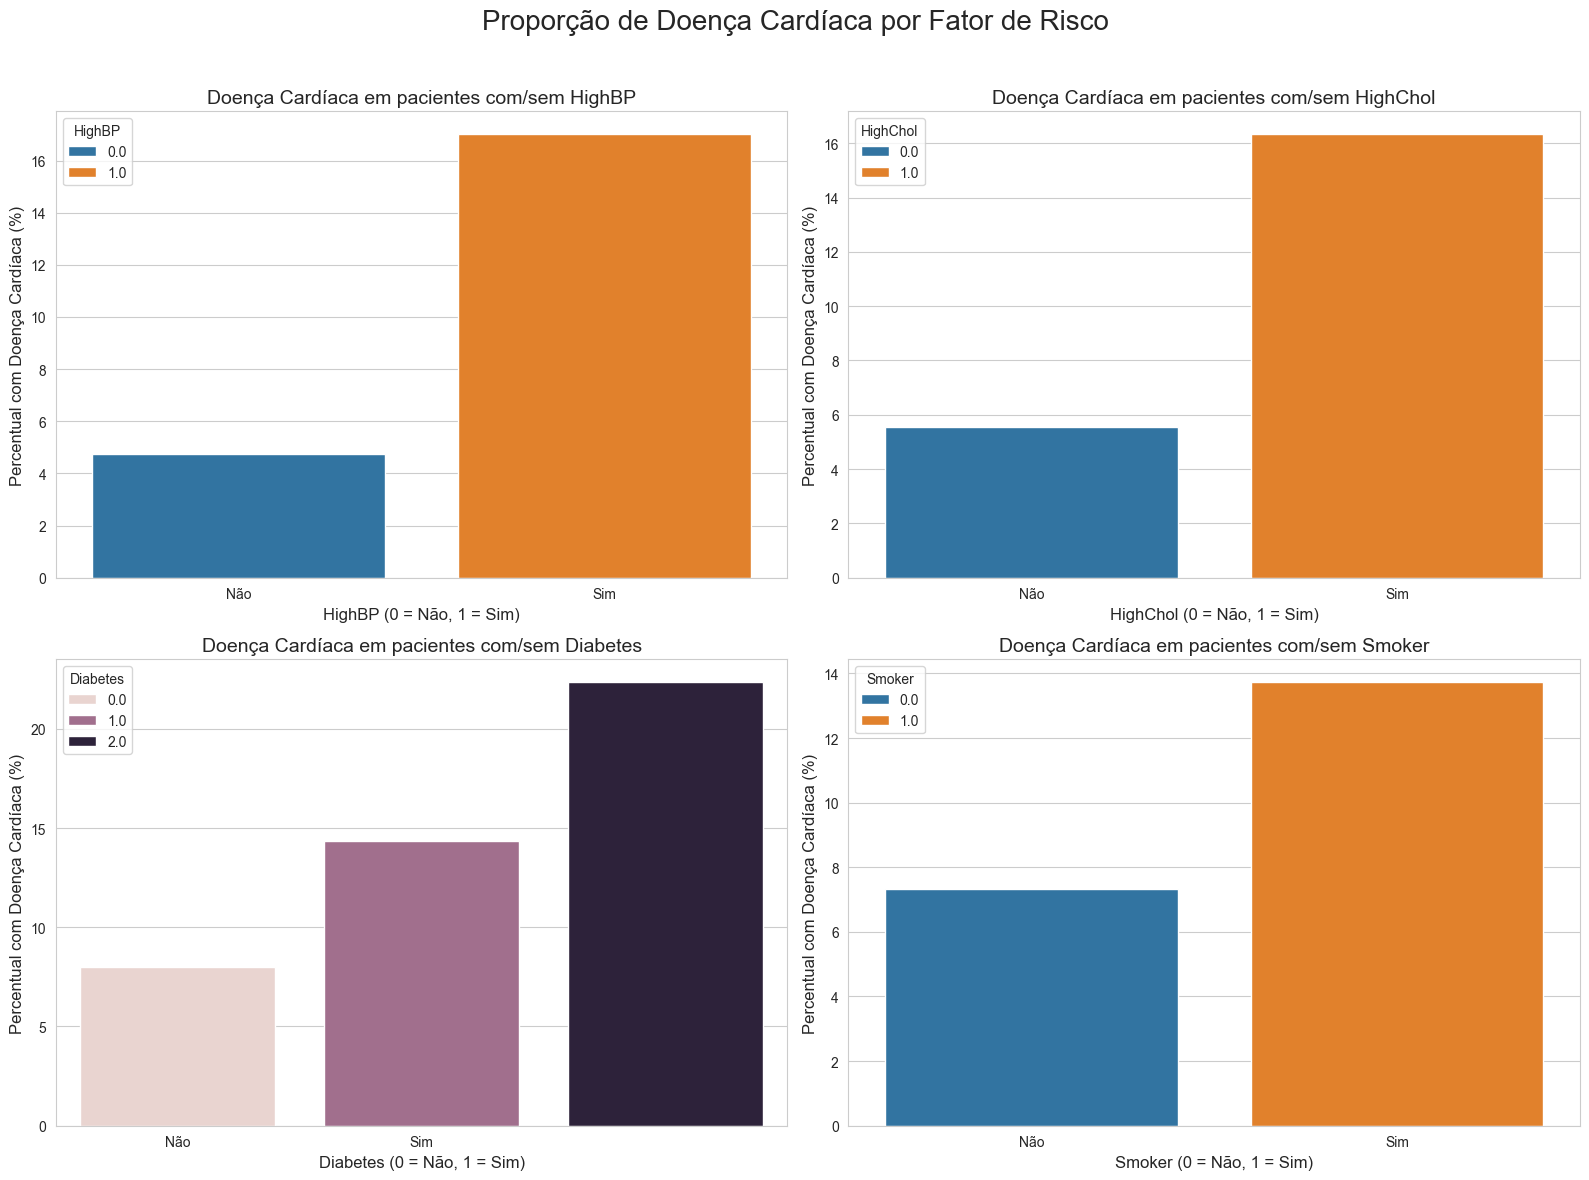

In [ ]:
# Selecionando as variáveis binárias
binary_features = ['HighBP', 'HighChol', 'Diabetes', 'Smoker']

# Configurando os subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Proporção de Doença Cardíaca por Fator de Risco', fontsize=20)

# Criando os gráficos de barras de proporção
for i, feature in enumerate(binary_features):
    # Calculando a proporção e resetando o índice para plotagem
    prop_df = df.groupby(feature)['HeartDiseaseorAttack'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

    # Plotando apenas a barra para HeartDiseaseorAttack == 1
    sns.barplot(ax=axes[i//2, i%2], x=feature, y='percent', data=prop_df[prop_df['HeartDiseaseorAttack'] == 1], hue=feature)
    axes[i//2, i%2].set_title(f'Doença Cardíaca em pacientes com/sem {feature}', fontsize=14)
    axes[i//2, i%2].set_ylabel('Percentual com Doença Cardíaca (%)', fontsize=12)
    axes[i//2, i%2].set_xlabel(f'{feature} (0 = Não, 1 = Sim)', fontsize=12)

    axes[i//2, i%2].set_xticks([0, 1])
    axes[i//2, i%2].set_xticklabels(['Não', 'Sim'])


plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

> **Análise dos Gráficos de Proporção:**
>
>Os gráficos mostram de forma inequívoca que a presença de Pressão Alta (HighBP), Colesterol Alto (HighChol) e Diabetes está associada a uma maior proporção de casos de doença cardíaca. Para fumantes (Smoker), a proporção também é maior em comparação com não fumantes, embora a diferença seja menos pronunciada do que para as outras condições.

#### **3.6. Normalização das Features (Feature Scaling) e Pipeline Final**

Agora, vamos adicionar a etapa de normalização e juntar tudo para preparar os dados finais para a modelagem.

In [19]:
from sklearn.preprocessing import StandardScaler

# 1. Divisão em Treino e Teste (já feita anteriormente)
# X_train, X_test, y_train, y_test

# 2. Normalização das Features
# Inicializamos o StandardScaler
scaler = StandardScaler()

# ATENÇÃO: Ajustamos (fit) o scaler APENAS nos dados de treino
scaler.fit(X_train)

# Transformamos os dados de treino e de teste com o scaler ajustado
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# O resultado é um array NumPy, vamos convertê-lo de volta para um DataFrame para visualização
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print("Visualização dos dados de treino após a normalização:")
display(X_train_scaled.head())

# 3. Balanceamento com SMOTE (nos dados de treino já normalizados)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

print("\nShape de X_train após normalização e SMOTE:", X_train_resampled.shape)
print("Distribuição da classe no y_train após SMOTE:")
print(y_train_resampled.value_counts(normalize=True))

Visualização dos dados de treino após a normalização:


,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.094993,-0.889565,0.205437,-0.249055,1.069250,-0.216163,-0.448896,-1.657592,-1.257883,-1.963932,...,0.23834,-0.319689,2.251163,3.438176,2.796650,2.094880,-0.884503,0.617706,-0.988815,-2.337071
1,-0.913248,-0.889565,0.205437,-1.426816,1.069250,-0.216163,-0.448896,0.603285,0.794987,0.509183,...,0.23834,-0.319689,-0.565182,-0.454350,-0.517075,-0.477354,-0.884503,0.940686,0.019086,1.008672
2,1.094993,-0.889565,0.205437,2.400908,-0.935235,-0.216163,-0.448896,0.603285,0.794987,0.509183,...,0.23834,-0.319689,1.312382,-0.065098,0.035213,2.094880,-0.884503,-0.028253,-0.988815,0.052746
3,1.094993,1.124145,0.205437,-0.396275,1.069250,-0.216163,-0.448896,-1.657592,0.794987,0.509183,...,0.23834,-0.319689,-1.503964,-0.454350,-0.517075,-0.477354,1.130578,0.617706,-0.988815,1.008672
4,1.094993,1.124145,0.205437,0.487046,-0.935235,4.626140,2.312886,-1.657592,0.794987,0.509183,...,0.23834,-0.319689,0.373600,-0.454350,2.796650,2.094880,-0.884503,1.263665,0.019086,-1.381144



Shape de X_train após normalização e SMOTE: (329700, 21)
Distribuição da classe no y_train após SMOTE:
HeartDiseaseorAttack
0.0    0.5
1.0    0.5
Name: proportion, dtype: float64


---

#### **Análise detalhada com Pandas Profiling**

In [26]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Relatório de Análise de Doença Cardíaca")
profile.to_file("../../docs/heart_disease_report-v2.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 278.12it/s]


---

### **4. Modelagem**